In [ ]:
import pandas as pd
import statsmodels.api as sm

# Criando um DataFrame com os dados
data_rd = {'nota_exame': [80, 70, 85, 60, 78, 73],
           'bolsa': ['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não']}

df_rd = pd.DataFrame(data_rd)

# Criando a variável indicadora para o tratamento (1 para Bolsa, 0 para Não Bolsa)
df_rd['tratamento'] = df_rd['bolsa'].apply(lambda x: 1 if x == 'Sim' else 0)

# Especificando a variável de corte
threshold = 75

# Criando uma variável indicadora para estar acima ou abaixo do threshold
df_rd['acima_threshold'] = (df_rd['nota_exame'] > threshold).astype(int)

# Ajustando o modelo de regressão descontínua
model_rd = sm.OLS(df_rd['tratamento'], sm.add_constant(df_rd['acima_threshold']))
result_rd = model_rd.fit()

# Imprimindo os resultados
print(result_rd.summary())

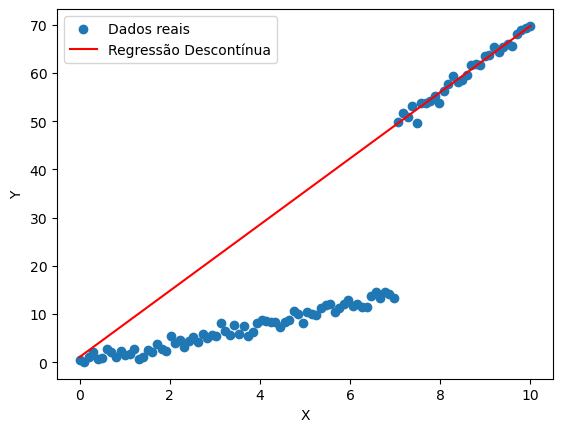

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados com mudança na relação
np.random.seed(42)
X = np.linspace(0, 10, 100)
Y = 2*X + np.random.normal(0, 1, 100)

# Introduzir uma mudança na relação
Y[70:] = Y[70:] + 5*X[70:]

# Adicionar variável indicadora para a mudança
indicadora = (X >= 7).astype(int)

# Adicionar coluna de uns para termo constante
X = sm.add_constant(X)

# Criar modelo de regressão descontínua
modelo = sm.OLS(Y, X).fit()

# Adicionar variável indicadora ao modelo
modelo = sm.OLS(Y, X * indicadora.reshape(-1, 1)).fit()

# Fazer previsões usando o modelo
previsoes = modelo.predict(X)

# Plotar os resultados
plt.scatter(X[:, 1], Y, label='Dados reais')
plt.plot(X[:, 1], previsoes, color='red', label='Regressão Descontínua')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [4]:
# %load ../src/rdd/dataset.py
import numpy as np 
import pandas as pd

def generate_data(seed, obs, std_dev, eligibility_threshold, treatment_effect, 
                positive_slope = True, after_cutoff = True):

    """
    This function generates spoofed data for our example. Although the running variable and target
    variables we test can be modified for specific purposes,they must be continuous.

    We generate our running variables values utilizing a uniform random variable. We then
    choose to treat if the running variable's valuesfall below the cutoff point We can change
    the sign based on the application. After this point, we choose to generate the data.

    INPUTS
    ------
    - seed: random state value included for reproducability
    - obs: integer representing number of observations
    - std_dev: constant that represents change between pre/post test values
    - treatment_effect: constant representing the base level of change

    OUTPUT
    ------
    spoofed_data: pandas dataframe containing the independent and target variables,
    as well as a binary indicator for treatment status
    """


    # initialize random state, generate data
    random_state = np.random.default_rng(seed) 
    running_variable = random_state.normal(loc = eligibility_threshold, size=obs) 

    #There are four cases:

    #Case 1: Positive Slope, Treatment Above the Cutoff 

    if (positive_slope == True) & (after_cutoff == True):
        # Apply Treatment above Cutoff
        treat = np.where(running_variable > eligibility_threshold, True, False)
        
        # Treatment Effect Discontinuity
        value_error = random_state.normal(0, std_dev, obs) + (treatment_effect * treat)
        y = running_variable + value_error

        # RETURN Pandas DF
        spoofed_data = pd.DataFrame(
            {
                "X": running_variable,
                "treatment": treat,
                "Y":y,
            }
        )
        return spoofed_data
    
    # Case 2: Positive Slope, Treatment Below Cutoff 

    elif (positive_slope == True) & (after_cutoff == False):
        # Apply Treatment above Cutoff
        treat = np.where(running_variable < eligibility_threshold, True, False)
        
        # Treatment Effect Discontinuity
        value_error = random_state.normal(0, std_dev, obs) + (treatment_effect * treat)
        y = running_variable + value_error

        # RETURN Pandas DF
        spoofed_data = pd.DataFrame(
            {
                "X": running_variable,
                "treatment": treat,
                "Y":y,
            }
        )
        return spoofed_data

    # Case 3: Negatove Slope, Treatment Above Cutoff    

    elif (positive_slope == False) & (after_cutoff == True):
        # Apply Treatment above Cutoff
        treat = np.where(running_variable > eligibility_threshold, True, False)
        
        # Treatment Effect Discontinuity
        value_error = random_state.normal(0, std_dev, obs) + (treatment_effect * treat)
        y = - running_variable + value_error

        # RETURN Pandas DF
        spoofed_data = pd.DataFrame(
            {
                "X": running_variable,
                "treatment": treat,
                "Y":y,
            }
        )
        return spoofed_data

    elif (positive_slope == False) & (after_cutoff == False):
        # Apply Treatment above Cutoff
        treat = np.where(running_variable < eligibility_threshold, True, False)
        
        # Treatment Effect Discontinuity
        value_error = random_state.normal(0, std_dev, obs) + (treatment_effect * treat)
        y = - running_variable + value_error

        # RETURN Pandas DF
        spoofed_data = pd.DataFrame(
            {
                "X": running_variable,
                "treatment": treat,
                "Y":y,
            }
        )
        return spoofed_data

In [5]:
# Load packages and scripts 
import numpy as np 

# Initialize random state value for reproducability
SEED = 16121515132518 #Ploomber
random_state = np.random.default_rng(SEED)

# Declare data generation parameters 
N = 10**4 # number of observations
TE = 2 # treatment effect we evaluate post-policy
STD = 0.3 # noise between pre-post changes in Y values, no measurement error
ELIGIBILITY_THRESHOLD = 5 #cutoff point

# Generate data into pandas dataFrame 
df = generate_data(SEED, N, STD, ELIGIBILITY_THRESHOLD, TE, positive_slope= True, after_cutoff= True)

df.head(15)

,X,treatment,Y
0,4.870078,False,4.581683
1,5.215001,True,7.389128
2,4.411041,False,4.524965
3,5.515494,True,7.275432
4,6.823859,True,9.273906
5,5.729496,True,7.243352
6,5.019296,True,7.632244
7,5.767535,True,7.730414
8,4.307496,False,3.652588
9,4.681779,False,5.251716


In [6]:
df.shape

(10000, 3)

In [14]:
#!conda install arviz

In [ ]:
#!conda install seaborn

In [12]:
# %load ../src/rdd/visuals.py
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def data_scatterplot(data, eligibility_threshold):

    """
    Take spoofed scatterplot data (features: X, treatment indicator, Y) and then plot
    utilizing matplotlib.

    INPUTS
    ------
    - df: pandas dataframe

    OUTPUTS
    -------
    - Scatterplot demarcating treatment and control groups, in addition to eligibility threshold
    """

    # set dimensions of graph, theme for contrast
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(16, 9))

    # plot treated values as scatter
    ax.scatter(
        data.X[data.treatment],
        data.Y[data.treatment],
        alpha=0.4,
        s=5,
        label="Treated Group",
    )

    # plot untreated values as scatter
    ax.scatter(
        data.X[~data.treatment],
        data.Y[~data.treatment],
        alpha=0.4,
        s=5,
        label="Untreated Group",
    )

    # plot vertical line denoting cutoff
    plt.axvline(
        x=eligibility_threshold, ls="-", color="black", label="Eligibility Threshold"
    )

    # labels and legends
    ax.set_xlabel("X Values - Pre/Post Program")
    ax.set_ylabel("Y Values - Post Program")
    ax.set_title("General Sharp RDD Setup")
    ax.legend()

    return ax


def diagnostic_plots(inf_data, treatment_effect, std):

    """
    Check the validity of our priors based on returned inference data

    INPUTS
    ------
    - inf_data: inference data object returned from train_model function
    - treatment_effect: specified treatment effect that we defined in our data
    - std: variation in points around our linear regressions defined in our data

    OUTPUTS:
    --------
    A set of plots mapping the validity of our delta and sigma priors.
    Plots should converge without difficults, and means should be within a 95% confidence interval
    """

    # MCMC Trace
    az.plot_trace(inf_data, var_names=["effect", "sigma"])

    # Posterior Histogram
    az.plot_posterior(
        inf_data,
        var_names=["effect", "sigma"],
        ref_val=[treatment_effect, std],
        hdi_prob=0.95,
    )


def regression_discontinuity_plot(
    data, eligibility_threshold, trained_mod, inf_data
):

    """
    Plots linear regression lines on top of data_scatterplot function to illustrate
    regression discontinuity effects. Samples posterior data from by train_model function
    in model.py to construct high density interval from our regression lines.

    INPUTS
    ------
    - df: data generated from dataset.py
    - trained_mod: our model trained in model.py
    - inf_data: our inference data generated in model.py

    OUTPUT
    ------
    Plot illustrating treatment group regression, control group regression, and
    scatterplot data from data_scatterplot.
    """

    sns.set_style("darkgrid")

    # instantiate data for future sampling
    mu_x = np.linspace(np.min(data.X), np.max(data.X), 500)
    lab_treated = np.zeros(mu_x.shape)

    # use aliases found in model.py file for lines
    with trained_mod:
        pm.set_data({"x_vals": mu_x, "treated_obs": lab_treated})
        ppc = pm.sample_posterior_predictive(inf_data, var_names=["mu", "y"])

    # scatterplot for treatment,control,eligibility threshold
    ax = data_scatterplot(data, eligibility_threshold)

    # plot control group's regression line, labels for mu
    az.plot_hdi(
        mu_x,
        ppc.posterior_predictive["mu"],
        color="C1",
        hdi_prob=0.95,
        ax=ax,
        fill_kwargs={"label": r"$\mu$ untreated (Counterfactual)"},
    )

    # instantiate data for future sampling
    mu_x = np.linspace(np.min(data.X), np.max(data.X), 500)
    lab_treated = np.ones(mu_x.shape)

    # use aliases found in model.py file
    with trained_mod:
        pm.set_data({"x_vals": mu_x, "treated_obs": lab_treated})
        ppc = pm.sample_posterior_predictive(inf_data, var_names=["mu", "y"])

    # plot treatment's regression line, labels for mu
    az.plot_hdi(
        mu_x,
        ppc.posterior_predictive["mu"],
        color="C0",
        hdi_prob=0.95,
        ax=ax,
        fill_kwargs={"label": r"$\mu$ treated (Actual Trend)"},
    )

    plt.legend()
    plt.show()


<Axes: title={'center': 'General Sharp RDD Setup'}, xlabel='X Values - Pre/Post Program', ylabel='Y Values - Post Program'>

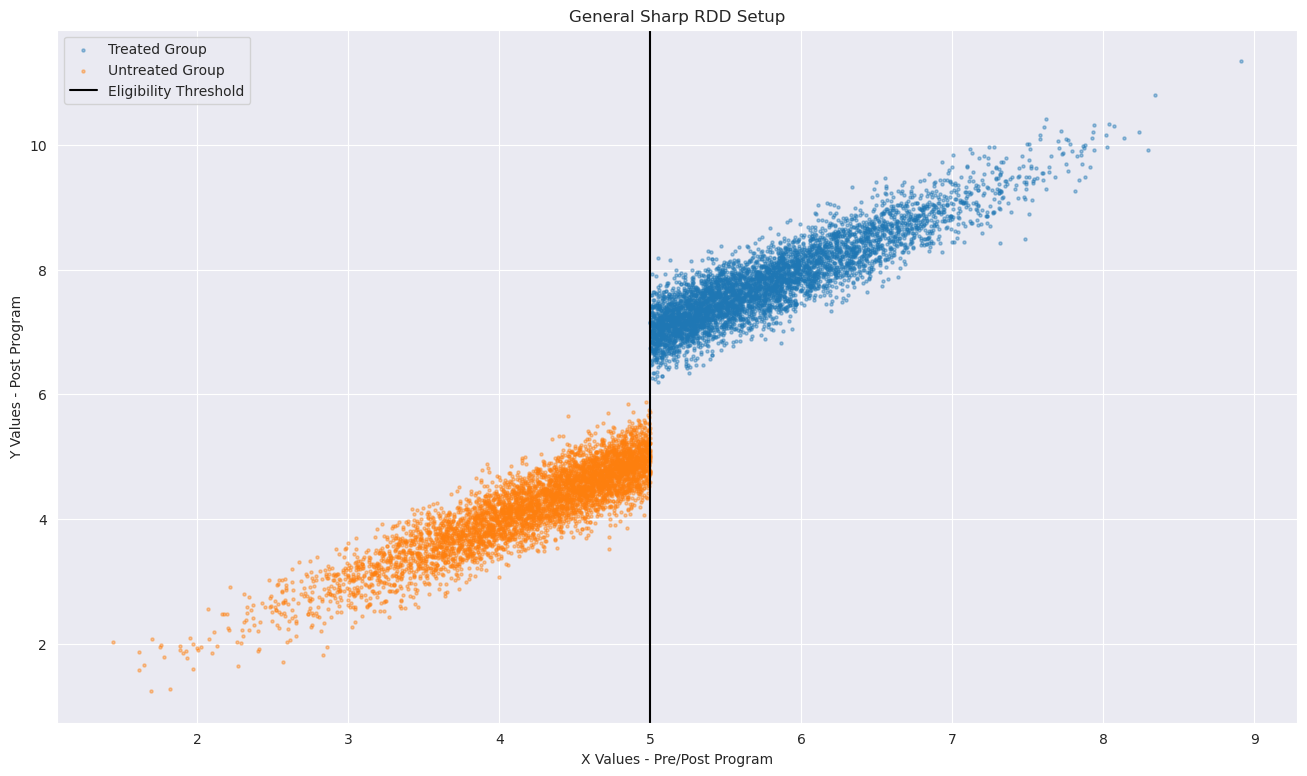

In [13]:
#visualizations adjust for the eligbility threshold specified
data_scatterplot(df, ELIGIBILITY_THRESHOLD)

                            OLS Regression Results                            
Dep. Variable:                MedCost   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     253.6
Date:                Wed, 15 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:00:11   Log-Likelihood:                -22843.
No. Observations:                3000   AIC:                         4.570e+04
Df Residuals:                    2991   BIC:                         4.576e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

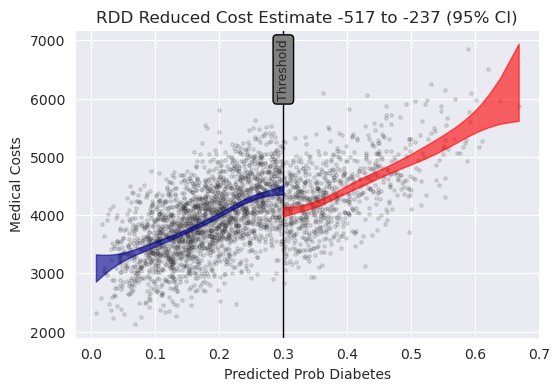

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

########################################
# Simulating data
np.random.seed(10)
n_cases = 3000 # total number of cases
# pretend this is predicted prob
prob = np.random.beta(3,10,size=n_cases)
# pretend this is med costs over a year
med_cost = 3000 + 5000*prob + -500*(prob > 0.3) + np.random.normal(0,500,n_cases)
df = pd.DataFrame(zip(prob,med_cost), columns=['Prob','MedCost'])
# could do something fancier with non-linear effects for prob
########################################

########################################
# Fitting regression model

# Knots are small distance from threshold
# (Could also do a knot right on threshold)
mod = smf.ols(formula='MedCost ~ bs(Prob,knots=[0.2,0.25,0.35,0.4]) + I(Prob > 0.3)', data=df)
res = mod.fit()
print(res.summary())
########################################

########################################
# Plotting fit

# Getting standard errors
prob_se = res.get_prediction().summary_frame()
prob_se['Prob'] = prob
prob_se.sort_values(by='Prob',inplace=True,ignore_index=True)
low = prob_se[prob_se['Prob'] <= 0.3].copy()
high = prob_se[prob_se['Prob'] > 0.3].copy()

# Getting effect for threshold bump
coef = res.summary2().tables[1]
ci = coef.iloc[1,4:6].astype(int).to_list()

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['Prob'], df['MedCost'], c='grey',
           edgecolor='k', alpha=0.15, s=5, zorder=1)
ax.axvline(0.3, linestyle='solid', alpha=1.0, 
           color='k',linewidth=1, zorder=2)
ax.fill_between(low['Prob'],low['mean_ci_lower'],
                low['mean_ci_upper'],alpha=0.6,
                zorder=3, color='darkblue')
ax.fill_between(high['Prob'],high['mean_ci_lower'],
                high['mean_ci_upper'],alpha=0.6,
                zorder=3, color='red')
ax.set_xlabel('Predicted Prob Diabetes')
ax.set_ylabel('Medical Costs')
ax.set_title(f'RDD Reduced Cost Estimate {ci[0]} to {ci[1]} (95% CI)')
ax.text(0.3,6500,'Threshold',rotation=90, size=9,
         ha="center", va="center",
         bbox=dict(boxstyle="round", ec='k',fc='grey'))
plt.savefig('RDD.png', dpi=500, bbox_inches='tight')
########################################